In [ ]:
# Scrapping swiggy data

from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/pizza-hut-village-road-nungambakkam-chennai-16235"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["Food_Name","Price"]

itemfull = []

for item in content:
  items = []
  Food_name = item.find('h3', class_="styles_itemNameText__3ZmZZ")
  price = item.find('span', class_="rupee")
  
  
  if(Food_name is not None):
    items.append(Food_name.text)
  else:
    items.append("Food_name is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("No Original Price")
  
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("food.csv",header=fheader)


<Response [200]>


In [ ]:
#Read the csv file
data = pd.read_csv("food.csv")

In [ ]:
data.head()

,Unnamed: 0,Food_Name,Price
0,0,Momo Mia Pizza - Veg,299.0
1,1,Momo Mia Pizza - Non Veg,329.0
2,2,Baked Cheesy Momos - Veg,199.0
3,3,Baked Cheesy Momos - Non Veg,219.0
4,4,Momo Mia Meal for 1 Veg,319.0


In [ ]:
data.tail()

,Unnamed: 0,Food_Name,Price
149,149,Pepsi Black,57.0
150,150,7up Pet Bottle,57.0
151,151,Mirinda Pet Bottle,57.0
152,152,Pepsi Pet Bottle,57.0
153,153,Choco Volcano,119.0


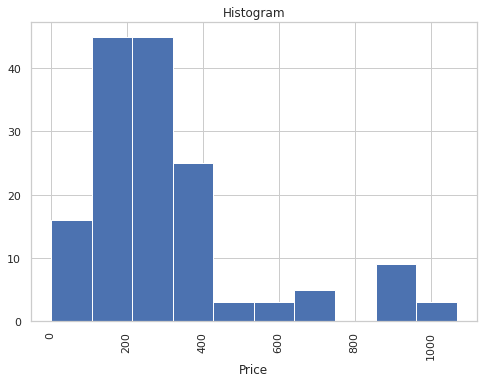

This chart shows that the maximum food items price lies between 100-300


In [ ]:
#Histogram
import matplotlib.pyplot as plt
import numpy as np
x=data.Food_Name
y=data.Price
plt.rcParams["figure.figsize"] = (8,5.5)
plt.xticks(rotation='vertical')
plt.xlabel("Price")
plt.title("Histogram")
plt.hist(y)
plt.show()
print("This chart shows that the maximum food items price lies between 100-300")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Violin plot for Price


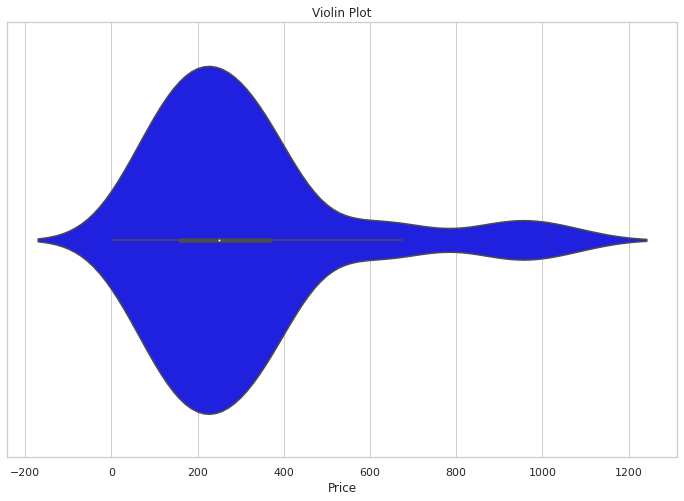

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style = 'whitegrid')
sns.violinplot(data["Price"],color='blue').set(title='Violin Plot')
print("Violin plot for Price")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'distplot')]

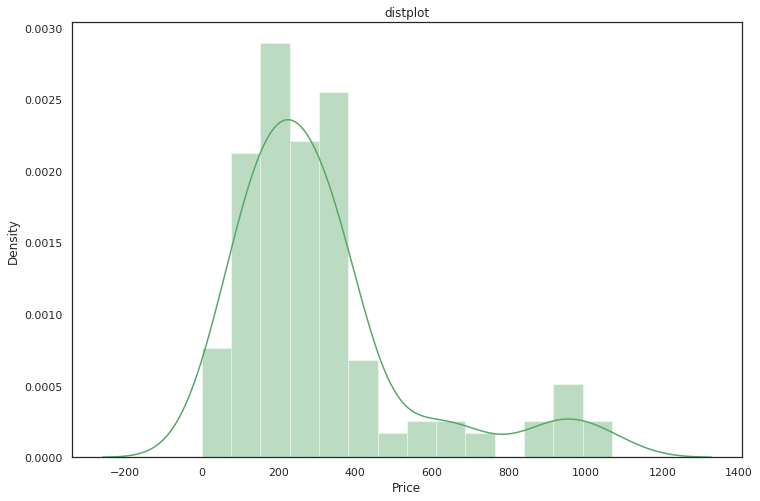

In [ ]:
# distplot
sns.set(rc={'figure.figsize':(12,8)})
sns.set( style = "white" )
sns.distplot(y, kde = True, color = "g").set(title='distplot')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


This graph inferms that the 16 different food items have the same price as '369Rs'


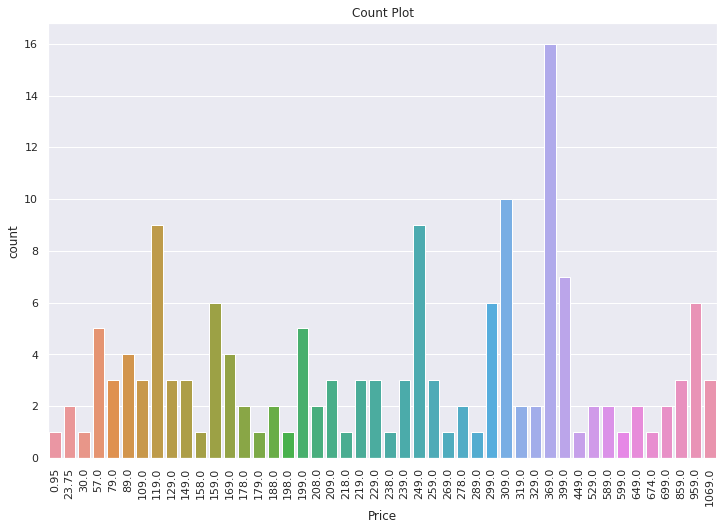

In [ ]:
#Count plot
df1=data.tail(15)
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation='vertical')
sns.countplot(data["Price"]).set(title='Count Plot')
print("This graph inferms that the 16 different food items have the same price as '369Rs'")